# CODE TO PREDICT STOCK MARKET PRICE

# TASK #1: LIBRARIES KEY LIBRARIES AND DATASETS 

In [1]:
# This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.
# import key libraries and datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/01 AWS Course/Udemy/multiple linear reg/Multiple+Linear+Regression+in+SKLearn/S&P500_Stock_Data.csv')

In [4]:
df.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [5]:
df.tail()

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# TASK #2: PERFORM DATA VISUALIZATION

<Figure size 720x720 with 0 Axes>

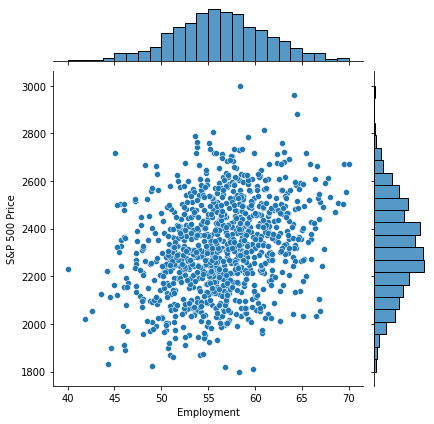

In [15]:

plt.figure(figsize=(10,10))
sns.jointplot(data=df, x='Employment', y='S&P 500 Price');

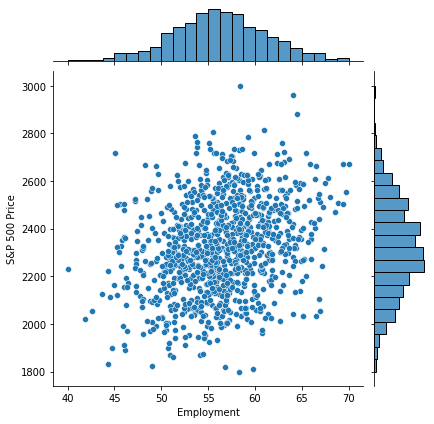

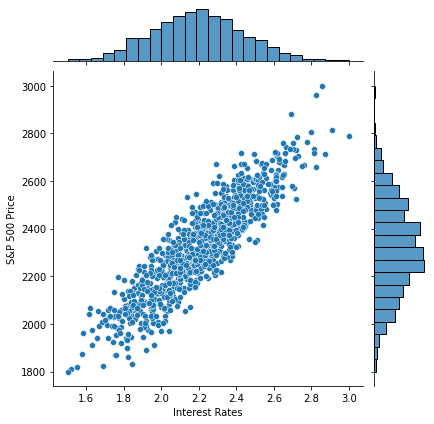

In [16]:
sns.jointplot(data=df, x='Interest Rates', y='S&P 500 Price')

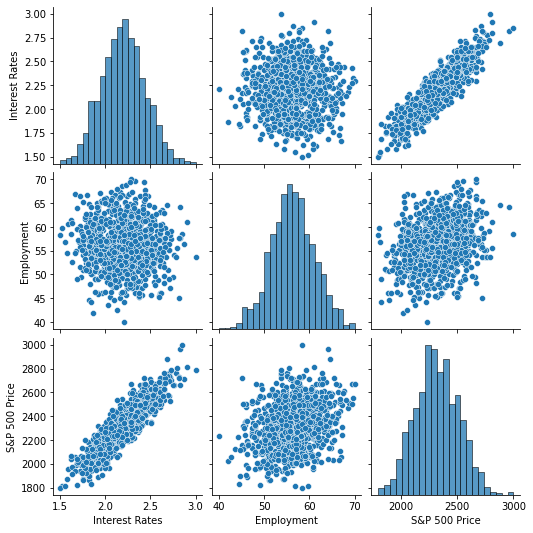

In [17]:
sns.pairplot(data=df)

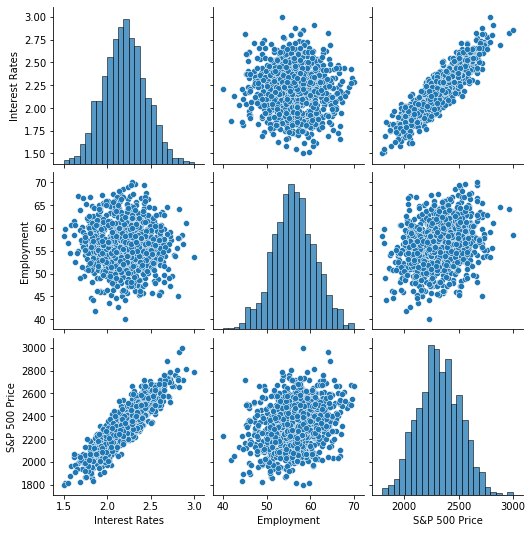

# TASK #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [19]:
y = df['S&P 500 Price']

In [21]:
X = df.drop(columns='S&P 500 Price')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TASK #4: TRAIN AND EVALUATE THE MACHINE LEARNING MODEL

In [27]:
from sklearn.linear_model import LinearRegression


In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
print(model.coef_)
print(model.intercept_)

[730.50972033  12.18926058]
31.552228079162433


Linear Model Coefficient (m):  [727.33262596  12.27370773]
Linear Model Coefficient (b):  32.6257075205599


In [32]:
predict = model.predict(X_test)
predict[:10]

array([2348.71388485, 2782.23008095, 2223.61129791, 2423.43818951,
       2353.65105317, 2375.18902436, 2329.18320588, 2355.31188398,
       2116.87008379, 2456.74036079])

array([2117.36495047, 2417.41465791, 2445.92218287, 2029.7500736 ,
       2641.22578061, 2533.61497578, 2474.43219238, 2398.733601  ,
       2640.65271478, 2269.54257884])

In [33]:
y_test[:10]

521    2351.058370
737    2882.089818
740    2208.325043
660    2394.890495
411    2262.460091
678    2334.097117
626    2289.185468
513    2274.612243
859    2077.045715
136    2472.159451
Name: S&P 500 Price, dtype: float64

316    1968.758078
82     2334.154947
306    2430.900994
505    2207.331004
118    2705.513622
233    2527.086457
373    2569.286651
417    2448.012282
119    2612.254563
355    2303.937315
Name: S&P 500 Price, dtype: float64

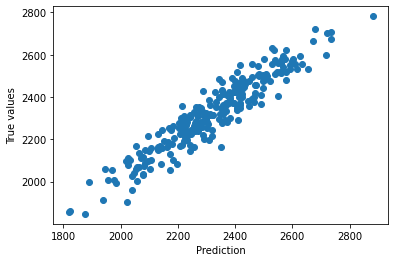

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=predict)
plt.xlabel('Prediction')
plt.ylabel('True values');

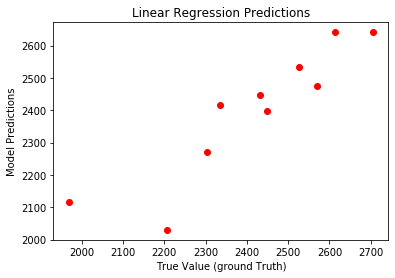

In [40]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, predict)),'.3f'))
MSE = mean_squared_error(y_test, predict)
MAE = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - predict) / y_test )) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 59.969 
MSE = 3596.2897996949637 
MAE = 47.88849936101288 
R2 = 0.8922772505766147 
Adjusted R2 = 0.8914050015934294 
Mean Absolute Percentage Error = 2.0781876400509085 %


# EXCELLENT JOB!